In [391]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [392]:
from sklearn.model_selection import RandomizedSearchCV


In [393]:
X = pd.read_excel('dt_train.xlsx')
y = pd.read_excel('dt_test.xlsx')

In [394]:
X.head(30)

,Unnamed: 0,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [395]:
y.head(7)

,Unnamed: 0,passengerId,pclass,name,sex,age,sibSp,parch,ticket,fare,cabin,embarked
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [396]:
X.isna().sum()
print('Train Shape:', X.shape)
y.isna().sum()
print('Test Shape:', y.shape)

Train Shape: (891, 12)
Test Shape: (418, 12)


In [397]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  891 non-null    int64  
 1   survived    891 non-null    int64  
 2   pclass      891 non-null    int64  
 3   name        891 non-null    object 
 4   sex         891 non-null    object 
 5   age         714 non-null    float64
 6   sibsp       891 non-null    int64  
 7   parch       891 non-null    int64  
 8   ticket      891 non-null    object 
 9   fare        891 non-null    float64
 10  cabin       204 non-null    object 
 11  embarked    889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [398]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   418 non-null    int64  
 1   passengerId  418 non-null    int64  
 2   pclass       418 non-null    int64  
 3   name         418 non-null    object 
 4   sex          418 non-null    object 
 5   age          332 non-null    float64
 6   sibSp        418 non-null    int64  
 7   parch        418 non-null    int64  
 8   ticket       418 non-null    object 
 9   fare         417 non-null    float64
 10  cabin        91 non-null     object 
 11  embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


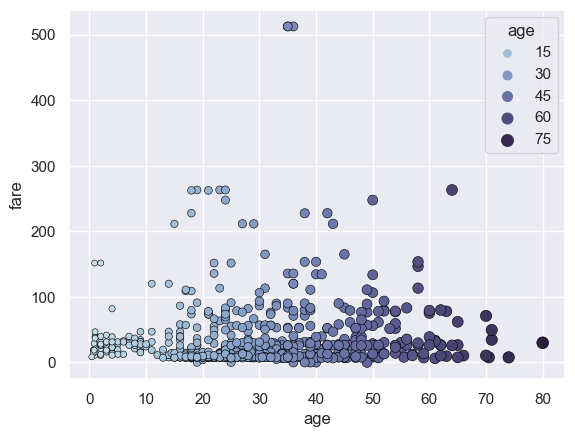

In [399]:
sns.set_theme(style="darkgrid")
color = sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
sns.scatterplot(data= X, x='age', y='fare', hue='age', size='age', palette=color, edgecolor='black')
plt.show()

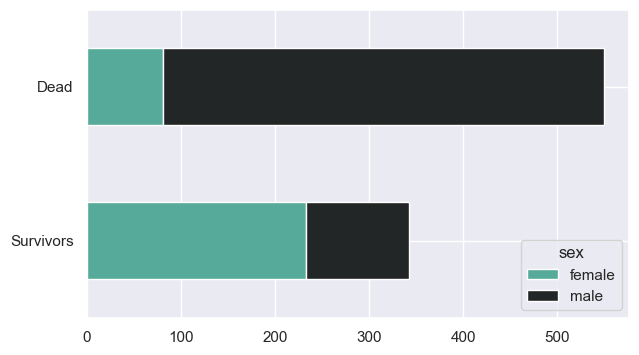

In [400]:
style = sns.color_palette("dark:#5A9_r", as_cmap=True)
survivors = X[X['survived'] == 1]['sex'].value_counts()
dead = X[X['survived'] == 0]['sex'].value_counts()
data = pd.DataFrame([survivors, dead ])
data.index = ['Survivors','Dead']
data.plot(kind='barh', stacked=True, figsize=(7,4), colormap=style)
plt.show()

In [401]:
X.head(10)

,Unnamed: 0,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


c:\Users\André Henrique\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


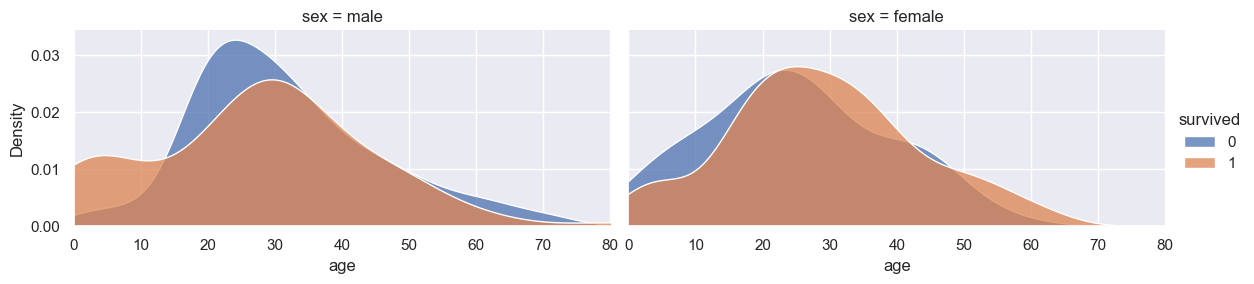

In [402]:
ft = sns.FacetGrid(data=X, col='sex', hue='survived',aspect=2)
ft.map(sns.kdeplot, 'age', multiple='stack')
ft.set(xlim=(0, X['age'].max()))
ft.add_legend()
plt.show()

In [403]:
sf = X['survived'] == 1
female = X['sex'] == "female"
ft = X.loc[(sf)&(female)]

print("Average age of surviving women:", int(ft['age'].mean()))

Average age of surviving women: 28


In [404]:
sm = X['survived'] == 1
male = X['sex'] == "male"
ft = X.loc[(sm)&(male)]

print("Average age of surviving men:", int(ft['age'].mean()))

Average age of surviving men: 27


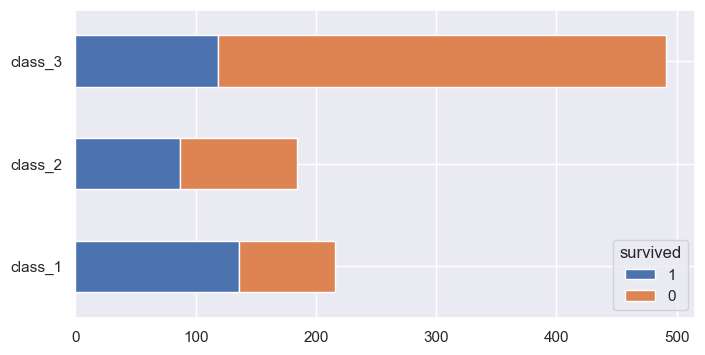

In [405]:
class_1 = X[X['pclass'] == 1]['survived'].value_counts()
class_2 = X[X['pclass'] == 2]['survived'].value_counts()
class_3 = X[X['pclass'] == 3]['survived'].value_counts()
dtpclass = pd.DataFrame([class_1, class_2, class_3])
dtpclass.index = ['class_1', 'class_2', 'class_3']
dtpclass.plot(kind='barh', stacked=True, figsize=(8,4))
plt.show()

In [406]:
dfage = X[X['survived'] == 1]['age']
print("Average age of survivors overall:", int(dfage.mean()))

Average age of survivors overall: 28


In [407]:
X.drop(columns=['name', 'sibsp'], axis=1, inplace=True)

In [408]:
X.head(20)

,Unnamed: 0,survived,pclass,sex,age,parch,ticket,fare,cabin,embarked
0,0,0,3,male,22.0,0,A/5 21171,7.2500,NaN,S
1,1,1,1,female,38.0,0,PC 17599,71.2833,C85,C
2,2,1,3,female,26.0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,1,1,female,35.0,0,113803,53.1000,C123,S
4,4,0,3,male,35.0,0,373450,8.0500,NaN,S
5,5,0,3,male,NaN,0,330877,8.4583,NaN,Q
6,6,0,1,male,54.0,0,17463,51.8625,E46,S
7,7,0,3,male,2.0,1,349909,21.0750,NaN,S
8,8,1,3,female,27.0,2,347742,11.1333,NaN,S
9,9,1,2,female,14.0,0,237736,30.0708,NaN,C


In [409]:
#Data Search
columns = ['survived', 'pclass', 'sex', 'age', 'parch', 'fare', 'cabin', 'embarked']
output = [len(X[X[x] == 'S']) for x in columns]

print(output)

[0, 0, 0, 0, 0, 0, 0, 644]


In [410]:
(X['embarked'] == 'Q').sum()

77

In [411]:
(X['embarked'] == 'C').sum()

168

In [412]:
dt_set = [X,y]
for data in dt_set:
    data['age'] = data['age'].interpolate().astype('int64')

In [413]:
for data in dt_set:
    data['fare'] = data['fare'].interpolate().astype('int64')

In [414]:
X.head()

,Unnamed: 0,survived,pclass,sex,age,parch,ticket,fare,cabin,embarked
0,0,0,3,male,22,0,A/5 21171,7,NaN,S
1,1,1,1,female,38,0,PC 17599,71,C85,C
2,2,1,3,female,26,0,STON/O2. 3101282,7,NaN,S
3,3,1,1,female,35,0,113803,53,C123,S
4,4,0,3,male,35,0,373450,8,NaN,S


In [415]:
mapemk = {'S':1, 'C':2,'Q':3}
for dt in dt_set:
    dt['embarked'] = dt['embarked'].map(mapemk)

In [416]:
for data in dt_set:
    data['embarked'] = data['embarked'].interpolate().astype('int64')

In [417]:
X.head(7)

,Unnamed: 0,survived,pclass,sex,age,parch,ticket,fare,cabin,embarked
0,0,0,3,male,22,0,A/5 21171,7,NaN,1
1,1,1,1,female,38,0,PC 17599,71,C85,2
2,2,1,3,female,26,0,STON/O2. 3101282,7,NaN,1
3,3,1,1,female,35,0,113803,53,C123,1
4,4,0,3,male,35,0,373450,8,NaN,1
5,5,0,3,male,44,0,330877,8,NaN,3
6,6,0,1,male,54,0,17463,51,E46,1


In [418]:
X['ticket'] = 0
X['cabin'] = 0

In [419]:
map_sex = {"male": 1, "female": 2}
for dataset in dt_set:
    dataset['sex'] = dataset['sex'].map(map_sex)

In [420]:
X.head(5)

,Unnamed: 0,survived,pclass,sex,age,parch,ticket,fare,cabin,embarked
0,0,0,3,1,22,0,0,7,0,1
1,1,1,1,2,38,0,0,71,0,2
2,2,1,3,2,26,0,0,7,0,1
3,3,1,1,2,35,0,0,53,0,1
4,4,0,3,1,35,0,0,8,0,1


In [421]:
dt_x =  X.drop("survived", axis=1)
target = X["survived"]
dt_x.shape, X.shape

((891, 9), (891, 10))

In [422]:
y.drop(['name','sibSp'], axis=1, inplace=True)

In [423]:
y['survived'] = " "
y['ticket'] = 0
y['cabin'] = 0
y.head(7)

,Unnamed: 0,passengerId,pclass,sex,age,parch,ticket,fare,cabin,embarked,survived
0,0,892,3,1,34,0,0,7,0,3,
1,1,893,3,2,47,0,0,7,0,1,
2,2,894,2,1,62,0,0,9,0,3,
3,3,895,3,1,27,0,0,8,0,1,
4,4,896,3,2,22,1,0,12,0,1,
5,5,897,3,1,14,0,0,9,0,1,
6,6,898,3,2,30,0,0,7,0,3,


In [424]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold 

In [425]:
K_fold = KFold(n_splits=3, shuffle=True)

In [426]:
clf = RandomForestClassifier()
score = cross_val_score(clf, dt_x, target, cv=K_fold)

In [427]:
print("%0.2f accuracy with a stantard desviation of %0.2f" % (score.mean(), score.std()))

0.82 accuracy with a stantard desviation of 0.02


In [428]:
clf.fit(dt_x, target)

RandomForestClassifier()

In [429]:
dt_y = y.drop(['survived', 'passengerId'], axis=1)
pred = clf.predict(dt_y)

In [430]:
dt_y

,Unnamed: 0,pclass,sex,age,parch,ticket,fare,cabin,embarked
0,0,3,1,34,0,0,7,0,3
1,1,3,2,47,0,0,7,0,1
2,2,2,1,62,0,0,9,0,3
3,3,3,1,27,0,0,8,0,1
4,4,3,2,22,1,0,12,0,1
...,...,...,...,...,...,...,...,...,...
413,413,3,1,33,0,0,8,0,1
414,414,1,2,39,0,0,108,0,2
415,415,3,1,38,0,0,7,0,1
416,416,3,1,38,0,0,8,0,1


In [431]:
dt_y['survived'] = pred
submission = pd.DataFrame(y['passengerId'], dt_y['survived'])
submission.to_excel("submi.xlsx")